# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.

1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)

In [704]:
import pandas as pd
import numpy as np

airbnb = pd.read_csv("./data/airbnb_hw.csv")

# It seems that we need to cast the Price column to a string, then remove the commas, then cast it back
airbnb["Price"] = airbnb["Price"].str.replace(",", "")
airbnb["Price"] = pd.to_numeric(airbnb["Price"], errors="coerce")

# I decided to remove the commas before casting it to an integer, to ensure we don't miss any valid data before casting to numeric

In [705]:
airbnb["Price"].dtype

dtype('int64')

In [706]:
airbnb[airbnb["Price"].isna()]

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating


2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 

In [707]:
police = pd.read_csv("./data/mn_police_use_of_force.csv")
si = police["subject_injury"]

total_si_null = si.isna().sum()
total_si_not_null = si.notna().sum()

proportion = total_si_null / (total_si_not_null + total_si_null)
print("Proportion of NA to non-NA:", proportion)

# This proportion is a bit concerning, as if you wanted to use this value to derive trends from the data, you are going to have to drop a third of your dataset

Proportion of NA to non-NA: 0.7619342359767892


In [708]:
police_cleaned = police.dropna(subset=["subject_injury"])
police_cleaned

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
9,2016/01/01 02:38:23,Fight,No,DISCON,No,Chemical Irritant,Crowd Control Mace,Black,Male,18.0,commission of crime,1,Downtown West
10,2016/01/01 02:38:23,Fight,No,DISCON,No,Chemical Irritant,Chemical Munitions,Black,Male,18.0,commission of crime,1,Downtown West
11,2016/01/01 02:39:47,Suspicious Person,No,DISCON,Yes,Bodily Force,Body Weight to Pin,Black,Male,21.0,Tensed,5,Lowry Hill East
12,2016/01/01 02:39:47,Suspicious Person,No,DISCON,Yes,Bodily Force,Joint Lock,Black,Male,21.0,Tensed,5,Lowry Hill East
13,2016/01/01 02:39:47,Suspicious Person,No,DISCON,Yes,Bodily Force,Body Weight to Pin,Black,Male,21.0,Tensed,5,Lowry Hill East
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4932,2018/05/31 17:48:10,Traffic Law Enforcement,No,FLEE,Yes,Bodily Force,Push Away,Black,Male,15.0,Assaulted Officer,4,Jordan
4934,2018/06/01 12:37:52,Theft,No,FLEEFT,Yes,Taser,Firing Darts,Black,Male,42.0,Fled on Foot,3,Powderhorn Park
4936,2018/06/02 00:14:11,Bait Vehicle Auto Theft,No,AUTOTH,No,Bodily Force,Joint Lock,Black,Male,24.0,Fled in Vehicle,1,Loring Park
4937,2018/06/02 00:14:11,Bait Vehicle Auto Theft,No,AUTOTH,No,Gun Point Display,Compliance,Black,Male,24.0,Fled in Vehicle,1,Loring Park


In [709]:
# Inspect the columns for any missing values
police_cleaned[['subject_injury', 'force_type']].isna().sum()

cross_tab = pd.crosstab(police_cleaned['subject_injury'], police_cleaned['force_type'])

cross_tab

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal Projectile,Police K9 Bite,Taser
subject_injury,,,,,,,,,
No,0,1093,131,2,33,34,1,2,150
Yes,2,1286,41,0,44,40,2,44,172


In [710]:
cross_tab_with_missing = pd.crosstab(police['subject_injury'], police['force_type'], dropna=False)

# Cross-tab with missing values
print(cross_tab_with_missing)

missing_data = police[police['subject_injury'].isna() | police['force_type'].isna()]
print(missing_data)

# It seems that there is no obvious pattern as to what data is missing, and all the variables have pretty much the same rate of NaNs

force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
No                  0          1093                131        2   
Yes                 2          1286                 41        0   
NaN                 2          7051               1421        0   

force_type      Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury                                                      
No                             33                 34            0   
Yes                            44                 40            0   
NaN                            27                 74           87   

force_type      Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury                                                        
No                                   1                            0   
Yes                                  2                            0   
NaN                               

3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.

In [711]:
pretrial = pd.read_csv("./data/October 2017 Cohort_Virginia Pretrial Data Project_Deidentified FINAL Update_10272021.csv", low_memory=False)
column = "WhetherDefendantWasReleasedPretrial"

pretrial[column] = pd.to_numeric(pretrial[column], errors='coerce') # Coerce the variable to numeric

pretrial[column] = pretrial[column].apply(lambda x: x if x in [0, 1] else np.nan)
pretrial["WhetherDefendantWasReleasedPretrial_nan"] = pretrial["WhetherDefendantWasReleasedPretrial"].isnull()

pretrial[[column, "WhetherDefendantWasReleasedPretrial_nan"]]

,WhetherDefendantWasReleasedPretrial,WhetherDefendantWasReleasedPretrial_nan
0,NaN,True
1,0.0,False
2,0.0,False
3,0.0,False
4,1.0,False
...,...,...
22981,1.0,False
22982,1.0,False
22983,1.0,False
22984,1.0,False


4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [712]:
imposed_numeric = pd.to_numeric(pretrial["ImposedSentenceAllChargeInContactEvent"], errors="coerce")

imposed_and_sentence_type = pd.DataFrame({
    "ImposedSentenceAllChargeInContactEvent": imposed_numeric,
    "SentenceTypeAllChargesAtConvictionInContactEvent": pretrial["SentenceTypeAllChargesAtConvictionInContactEvent"]
})


imposed_null = imposed_and_sentence_type[imposed_and_sentence_type["ImposedSentenceAllChargeInContactEvent"].isnull()]
print(imposed_null["SentenceTypeAllChargesAtConvictionInContactEvent"].unique())
# Looking at this, we can see that the only values that have ImposedSentenceAllChargeInContactEvent as null are 9 and 4

[9 4]


In [713]:
zero_sentence = imposed_and_sentence_type.query("ImposedSentenceAllChargeInContactEvent == 0")
zero_sentence["SentenceTypeAllChargesAtConvictionInContactEvent"].unique()

array([0])

In [714]:
# Looking at the above findings, the only 0s in the column are for Probation/no incarceration. 
# It feels appropriate to make the SentenceTypeAllChargesAtConvictionInContactEvent==4 rows 0s as well, as all charges in cohort contact resulted in pending, dismissed, deferred, etc.
# However, the SentenceTypeAllChargesAtConvictionInContactEvent==9 should remain NaN, as the record was not found, or it is unknown, and giving it a value would feel dishonest, as no value represents the data better

# Replace all occurences with 4 as 0
imposed_and_sentence_type.loc[imposed_and_sentence_type["SentenceTypeAllChargesAtConvictionInContactEvent"]==4, "ImposedSentenceAllChargeInContactEvent"] = 0

# Replace all occurences with 9 as NaN (already like this but for peace of mind)
imposed_and_sentence_type.loc[imposed_and_sentence_type["SentenceTypeAllChargesAtConvictionInContactEvent"]==9, "ImposedSentenceAllChargeInContactEvent"] = np.nan

imposed_and_sentence_type

,ImposedSentenceAllChargeInContactEvent,SentenceTypeAllChargesAtConvictionInContactEvent
0,NaN,9
1,60.000000,0
2,12.000000,1
3,0.985626,1
4,0.000000,4
...,...,...
22981,0.000000,4
22982,NaN,9
22983,0.000000,4
22984,0.000000,4


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [715]:
%pip install xlrd

74939.98s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [765]:
shark_attacks = pd.read_excel("./data/GSAF5.xls")
shark_attacks

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,...,Bronze whaler,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6987,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6988,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6989,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6990,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN


In [766]:
shark_attacks.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [767]:
print(shark_attacks["Unnamed: 21"].unique())
print(shark_attacks["Unnamed: 22"].unique())

# Only 1 occurence of 'stopped here', 'Teramo', and 'change filename' respectively
shark_attacks.loc[:,"Unnamed: 21"] = shark_attacks["Unnamed: 21"].replace('stopped here', np.nan)
shark_attacks.loc[:,"Unnamed: 22"] = shark_attacks["Unnamed: 22"].replace({'Teramo': np.nan, 'change filename': np.nan})

print(shark_attacks["Unnamed: 21"].unique())
print(shark_attacks["Unnamed: 22"].unique())

shark_attacks = shark_attacks.dropna(axis=1, how="all")

[nan 'stopped here']
[nan 'Teramo' 'change filename']
[nan]
[nan]


/var/folders/rw/kqv4w2bj5hx2v1ln61zfm4pr0000gn/T/ipykernel_25879/3634060264.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  shark_attacks.loc[:,"Unnamed: 21"] = shark_attacks["Unnamed: 21"].replace('stopped here', np.nan)
/var/folders/rw/kqv4w2bj5hx2v1ln61zfm4pr0000gn/T/ipykernel_25879/3634060264.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  shark_attacks.loc[:,"Unnamed: 22"] = shark_attacks["Unnamed: 22"].replace({'Teramo': np.nan, 'change filename': np.nan})


In [768]:
bad_years = shark_attacks[shark_attacks["Year"].isna() | (shark_attacks["Year"] > 2025.0)]
bad_years

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Fatal Y/N,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order
27,2024-07-04 00:00:00,2026.0,Unprovoked,USA,Texas,South Padre Island,Swimming,Victoria Ramos,F,18,...,N,?,6 ft shark,Valley Central,NaN,NaN,NaN,NaN,NaN,NaN
849,Reported 08-Jan-2017,NaN,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,Kerry Daniel,M,35,...,NaN,NaN,Bull shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.08.R,2017.01.08.R,6142.0
6761,Reported 19-Aug-1836,NaN,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,NaN,...,Y,NaN,NaN,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,230.0


In [769]:
shark_attacks.iloc[27, shark_attacks.columns.get_loc("Year")] = 2024.0
shark_attacks.iloc[849, shark_attacks.columns.get_loc("Year")] = 2017.0
shark_attacks.iloc[6761, shark_attacks.columns.get_loc("Year")] = 1836.0

In [770]:
bad_years = shark_attacks[shark_attacks["Year"].isna() | (shark_attacks["Year"] > 2025.0)]
bad_years

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Fatal Y/N,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order


In [771]:
shark_attacks["Year"].describe()

# As you can see, there is a great range of years, going from "0" (before A.D.) all the way up to recently in Jan. 2025

count    6992.000000
mean     1935.015875
std       272.048122
min         0.000000
25%      1947.000000
50%      1986.000000
75%      2009.000000
max      2025.000000
Name: Year, dtype: float64

In [723]:
%pip install matplotlib

74946.67s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


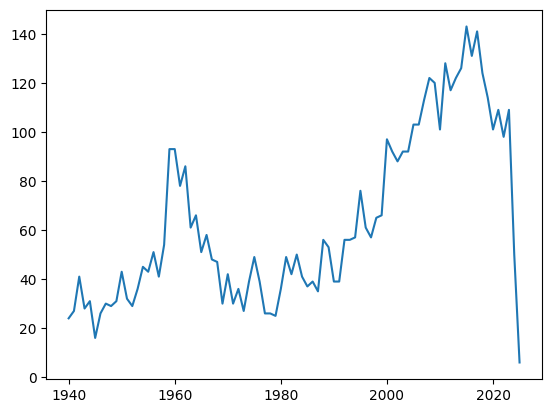

In [772]:
import matplotlib.pyplot as plt
filtered_years = shark_attacks[shark_attacks["Year"] >= 1940]

attacks = filtered_years.groupby("Year").size()

plt.plot(attacks)
plt.show()

# The attacks seem to be steadily increasing over time from 1940 to ~2020, when there is a sharp drop off. This is most likely due to the pandemic keeping people inside during ~2020, then a sharper drop off that is probably caused by missing data, as this year has barely started.

In [773]:
ages = shark_attacks["Age"]
freq = ages.value_counts()

freq

Age
16             92
19             90
17             88
18             85
17             85
               ..
36 & 26         1
77              1
Teens           1
28, 23 & 30     1
13 or 14        1
Name: count, Length: 246, dtype: int64

In [774]:
shark_attacks_cpy = shark_attacks.copy()

In [775]:
# Replacing all of the values that do not match a pattern and can be dealt with together with a best estimate
replacements = {
    "?": np.nan,
    "2 to 3 months": 1,
    "9 months":1,
    "18 months": 1,
    "!2": 2,
    "2½": 3,
    "6½": 7,
    "young": 10,
    '"young"': 10,
    "Teen": 16,
    "Teens": 16,
    "teen": 16,
    "18 to 22": 20,
    "20s": 25,
    "20's": 25,
    "20?": 20,
    "20/30": 25,
    "30s": 35,
    "mid-30s": 35,
    "mid-20s": 25,
    "40s": 45,
    "50s": 50,
    ">50": 55,
    "60s": 65,
    "60's": 65,
    "60+": 65,
    "Elderly": 70,
    "adult": 35,
    "(adult)": 35,
    '"middle-age"': 45,
    "Middle age": 45,
    "!6": 6,
    "a minor": 13,
    # for function later
    "Both 11": "11 & 11"
}
shark_attacks_cpy.loc[:, "Age"] = shark_attacks_cpy["Age"].replace(replacements)

In [776]:
# Function that splits up different ages such as "33 or 37" to average out the ages
# Use regex to locate strings with either or/to
import re

def average_out_ors(row):
    str_age = str(row["Age"])
    age_with_delimiter = re.split(r'\bor\b|\bto\b', str_age)

    if len(age_with_delimiter) > 1:
        print(f"before: {age_with_delimiter}")
        # row with or
        age_sum = 0
        count = 0
        for i in age_with_delimiter:
            i = i.strip()
            if i.isdigit():
                age_sum += int(i)
                count += 1
        cleaned_age = age_sum // count
        print(f"after: {cleaned_age}")
        return cleaned_age

    return row["Age"]

shark_attacks_cpy.loc[:, "Age"] = shark_attacks_cpy.apply(average_out_ors, axis=1)

before: ['18 ', ' 20']
after: 19
before: ['12 ', ' 13']
after: 12
before: ['8 ', ' 10']
after: 9
before: ['30 ', ' 36']
after: 33
before: ['33 ', ' 37']
after: 35
before: ['16 ', ' 18']
after: 17
before: ['21 ', ' 26']
after: 23
before: ['25 ', ' 35']
after: 30
before: ['25 ', ' 28']
after: 26
before: ['13 ', ' 18']
after: 15
before: ['7 ', ' 8']
after: 7
before: ['8 ', ' 10']
after: 9
before: ['9 ', ' 10']
after: 9
before: ['10 ', ' 12']
after: 11
before: ['31 ', ' 33']
after: 32
before: ['7 ', ' 8']
after: 7
before: ['13 ', ' 14']
after: 13


In [777]:
# Now, we will do a similar thing with the 'and' + '&' rows, but this time, create new rows with all the same data except for the age to account for the multiple ages
rows_to_add = []
def generate_rows_to_add(row):
    str_age = str(row["Age"])
    # regex to split on ',', 'and', or '&'
    age_with_delimiter = re.split(r'[,\s]*(?:and|&)[,\s]*|,\s*', str_age)

    if len(age_with_delimiter) > 1:
        nums = [int(num) for num in age_with_delimiter if num.strip().isdigit()]     

        print(nums)
        
        if len(nums) >= 1:
            print(f"nums: {nums}")
            first_num = nums[0]
            for i in range(1, len(nums)):
                new_row = row.copy()
                new_row["Age"] = nums[i]
                rows_to_add.append(new_row)

            return first_num

    return row["Age"]

shark_attacks_cpy.loc[:,"Age"] = shark_attacks_cpy.apply(generate_rows_to_add, axis=1)

# Turn array into dataframe and append it to the shark attacks dataframe
new_rows = pd.DataFrame(rows_to_add)
shark_attacks_cpy = pd.concat([shark_attacks_cpy, new_rows], ignore_index=True)

[45, 15]
nums: [45, 15]
[28, 22]
nums: [28, 22]
[22, 57, 31]
nums: [22, 57, 31]
[9, 60]
nums: [9, 60]
[28, 26]
nums: [28, 26]
[46, 34]
nums: [46, 34]
[28, 23, 30]
nums: [28, 23, 30]
[36, 26]
nums: [36, 26]
[21]
nums: [21]
[23, 20]
nums: [23, 20]
[7, 31]
nums: [7, 31]
[32, 30]
nums: [32, 30]
[9, 12]
nums: [9, 12]
[19]
nums: [19]
[23, 26]
nums: [23, 26]
[33, 37]
nums: [33, 37]
[37, 67, 35, 27, 27]
nums: [37, 67, 35, 27, 27]
[21, 34, 24, 35]
nums: [21, 34, 24, 35]
[30, 32]
nums: [30, 32]
[50, 30]
nums: [50, 30]
[17, 35]
nums: [17, 35]
[34, 19]
nums: [34, 19]
[33, 26]
nums: [33, 26]
[17, 16]
nums: [17, 16]
[11, 11]
nums: [11, 11]
[36, 23]
nums: [36, 23]
[14]
nums: [14]


In [778]:
# Now we are left with values that could not possibly be interpreted as numbers, so we can go ahead and make them NaN
ages = shark_attacks_cpy["Age"]
# Function to check if a value is not an integer
def is_not_integer(value):
    try:
        int(value)
        return False
    except (ValueError, TypeError):
        return True

# Filter the Series to include only non-integer values
non_integers = ages[ages.apply(is_not_integer)].dropna().unique()
non_integers

array(['M', '!!', '\xa0 ', ' ', 'Ca. 33', 'X', 'MAKE LINE GREEN', 'F',
       '  ', 'A.M.'], dtype=object)

In [779]:
shark_attacks_cpy["Age"] = pd.to_numeric(shark_attacks_cpy["Age"], errors="coerce")
shark_attacks_cpy["Age"].describe()

count    4015.000000
mean       28.079950
std        14.594992
min         1.000000
25%        17.000000
50%        24.000000
75%        36.000000
max        87.000000
Name: Age, dtype: float64

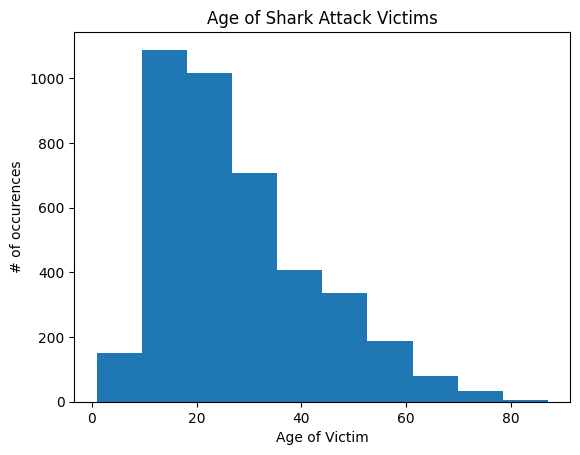

In [780]:
plt.hist(shark_attacks_cpy["Age"].dropna())
plt.xlabel("Age of Victim")
plt.ylabel("# of occurences")
plt.title("Age of Shark Attack Victims")
plt.show()

In [781]:
shark_attacks_sex = shark_attacks_cpy.copy()["Sex"]

In [782]:
shark_attacks_sex.unique()

array(['M', 'F', nan, ' M', 'M ', 'lli', 'M x 2', 'N', '.'], dtype=object)

In [783]:
replacements = {
    " M": "M",
    "M ": "M",
    "M x 2": "M",
}

shark_attacks_sex = shark_attacks_sex.replace(replacements)

In [784]:
shark_attacks_sex = shark_attacks_sex.apply(lambda x: x if x in {"M", "F"} else np.nan).astype('string')

In [785]:
shark_attacks_sex.unique()

<StringArray>
['M', 'F', <NA>]
Length: 3, dtype: string

In [786]:
counts = shark_attacks_sex.value_counts()

male_proportion = counts["M"]
female_proportion = counts["F"]

print(male_proportion / (male_proportion + female_proportion))

# The male proportion of attacks is 88%

0.8764376748523469


In [787]:
shark_attacks_type = shark_attacks_cpy.copy()["Type"]

In [788]:
shark_attacks_type.unique()

array(['Unprovoked', 'Provoked', ' Provoked', 'Questionable',
       'Watercraft', 'Sea Disaster', nan, '?', 'Unconfirmed',
       'Unverified', 'Invalid', 'Under investigation', 'Boat'],
      dtype=object)

In [789]:
shark_attacks_type = shark_attacks_type.str.strip().str.capitalize()

In [790]:
types = {'Provoked', 'Unprovoked', 'Unknown'}
shark_attacks_type = shark_attacks_type.where(shark_attacks_type.isin(types), 'Unknown').astype('string')

In [791]:
shark_attacks_type.unique()

<StringArray>
['Unprovoked', 'Provoked', 'Unknown']
Length: 3, dtype: string

In [792]:
total = shark_attacks_type.notna().sum()
counts = shark_attacks_type.value_counts()

print(counts["Unprovoked"] / total)
# The proportion of unprovoked attacks is 74%

0.7350135269827709


In [793]:
shark_attacks_fatal = shark_attacks_cpy.copy()["Fatal Y/N"]

In [794]:
shark_attacks_fatal.unique()

array(['N', 'Y', 'F', 'M', nan, 'n', 'Nq', 'UNKNOWN', 2017, 'Y x 2', ' N',
       'N ', 'y'], dtype=object)

In [795]:
shark_attacks_fatal = shark_attacks_fatal.str.strip().str.capitalize()
shark_attacks_fatal.unique()

array(['N', 'Y', 'F', 'M', nan, 'Nq', 'Unknown', 'Y x 2'], dtype=object)

In [796]:
types = {'Y', 'N', 'Unknown'}
shark_attacks_fatal = shark_attacks_fatal.where(shark_attacks_fatal.isin(types), 'Unknown').astype('string')

In [797]:
shark_attacks_fatal.unique()

<StringArray>
['N', 'Y', 'Unknown']
Length: 3, dtype: string

In [798]:
# Adding all the data back to the original dataframe
shark_attacks = shark_attacks_cpy
shark_attacks["Sex"] = shark_attacks_sex
shark_attacks["Type"] = shark_attacks_type
shark_attacks["Fatal Y/N"] = shark_attacks_fatal

In [799]:
# Likelyhood
unprovoked = shark_attacks[shark_attacks["Type"] == "Unprovoked"]
unprovoked_sex_counts = unprovoked["Sex"].value_counts()

print(unprovoked_sex_counts)

# Looking at the counts, we can see that sharks are much more likely to launch unprovoked attacks on women

Sex
M    4320
F     670
Name: count, dtype: Int64


In [800]:
provoked = shark_attacks[shark_attacks['Type'] == 'Provoked']
unprovoked_fatality_rate = unprovoked['Fatal Y/N'].value_counts(normalize=True).get('Y', 0)
provoked_fatality_rate = provoked['Fatal Y/N'].value_counts(normalize=True).get('Y', 0)

print(unprovoked_fatality_rate)
print(provoked_fatality_rate)

# Looking at the rates, we can see that unprovoked attacks are much more likely to lead to fatal attacks

0.24292909724912826
0.03426791277258567


In [801]:
fatal_by_sex = shark_attacks.groupby('Sex')['Fatal Y/N'].value_counts(normalize=True)
print("Fatality rate by sex:")
print(fatal_by_sex)

# It is slightly more likely that an attack on a male is fatal, but that may also be due to the higher number of attacks on males

Fatality rate by sex:
Sex  Fatal Y/N
F    N            0.761006
     Y            0.150943
     Unknown      0.088050
M    N            0.696223
     Y            0.220606
     Unknown      0.083171
Name: proportion, dtype: float64


In [754]:
# I always thought sharks were cool, and honestly it is probably more likely for a guy to do something stupid like swim with dangerous sharks, so this data has not swayed my opinion

In [802]:
# 9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)
shark_attacks_species_split = shark_attacks.copy()

In [803]:
shark_attacks_species_split['Species_splt'] = shark_attacks_species_split['Species '].apply(lambda x: str(x).split() if pd.notna(x) else [])


In [804]:
shark_attacks_species_split["White_Shark"] = shark_attacks_species_split["Species_splt"].apply(lambda x: 'White' in [str(c).capitalize() for c in x])

In [805]:
proportion_white_sharks = shark_attacks_species_split['White_Shark'].mean()

print(proportion_white_sharks)

# Around 10% of all attacks are from 'White' sharks

0.1005268403816033


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?

  This paper is about a small but important aspect of data cleaning: data tidying. These datasets are easy to manipulate, model, and visualize. It covers a framework that makes it easy to tidy messy datasets, as only a small set of tools are needed. Also, it makes it easy to develop these tools for analysis.

  2. Read the introduction. What is the "tidy data standard" intended to accomplish?

It intends to organize datasets in a consistent way to simplify the analysis and cleaning processes and tool integration. It also reduces the need for repeated data transformations and allows people to focus on their main goal instead of the logistics.

  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

-"Like families, tidy datasets are all alike but every messy dataset is messy in its own way.": Tidy datasets follow a consistent format, making them both similar to each other and easy to manipulate and obtain wanted trends simply.

-"For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general.": While it is generally easy to identify what constitutes observations and variables, it is hard to come up with a universal definition for what qualifies as an observation or variable across ALL datasets, as they can vary greatly in many ways.

  
  4. Read Section 2.2. How does Wickham define values, variables, and observations?

-Values are defined as usually either numbers of strings (if quantitative/qualitative). 
-Variables contain all values that measure the same underlying attribute (height, temperature, etc.) across all units.
-Observations contain all values measured on the same unit (person, a day, a race) across attributes

  5. How is "Tidy Data" defined in section 2.3?

A standard way of mapping the meaning of a dataset to its structure. It depends of how rows, columns, and tables are matched up with observations, variables, and types.

  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?

-Column headers are values, not variable names
-Multiple variables are stored in one column
-Variables are stored in both rows and columns
-Multiple types of observational units are stored in the same table
-A single observational unit is stored in multiple tables

-For table 4, the data is messy because the column headers are the values that should be included in each row, not something like 'income' and 'frequency'

-Melting a dataset (or stacking) is essentially turning columns into rows. In table 4, this would be creating new observations for each different religion and their income, and mapping that to the frequency that it occurs.

  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

Table 11 is messy, as the d1-d31 columns store unnecessary data for the observations that do not have data for that day. Table 12 is molten, as it combines these superfluous columns into a standardized 'date' column, which allows for the values once stored sporadically in d1-d31 to be stored in a single column.

  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

  The chicken and egg problem is that the usefulness of tidy data is very dependent on the tools that work with it. Since tidy tools are designed to work with tidy data, the development of a tool is linked to the development of others. This causes a situation where making improvements in tools may not lead to improvements of workflow. Wickham hopes that further work on data wrangling will lead to better tools and strategies for managing data. He envisions improvements in data manipulation and user-centered design.

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?